In [2]:
from sklearn.datasets import load_iris
import pandas as pd

In [3]:
iris = load_iris(as_frame=True)
data = iris.data
df=pd.DataFrame(data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.shape

(150, 5)

<BarContainer object of 3 artists>

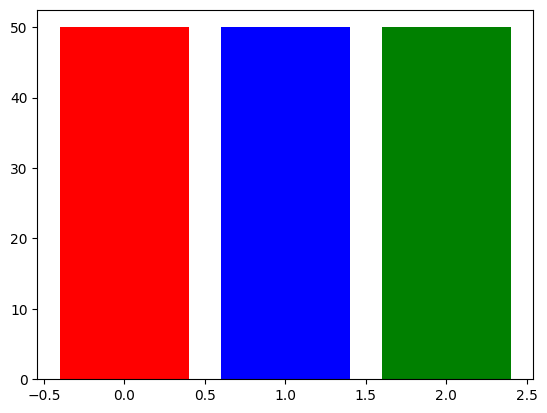

In [5]:
import matplotlib.pyplot as plt
counts = df['target'].value_counts()

plt.bar(counts.index, counts.values, color=["red", "blue", "green"])

<Axes: xlabel='target', ylabel='count'>

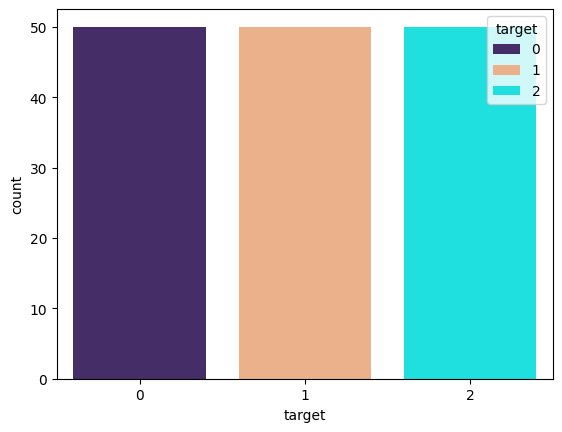

In [6]:
import seaborn as sns   
sns.countplot(x=df['target'], palette=['#432371',"#FAAE7B", "#00FFFFFF"],hue=df.target)

In [7]:
X= df.drop(columns=["target"], axis=1)
y = df['target']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [9]:
y_test.sort_index(inplace=True)
X_test.sort_index(inplace=True)

In [10]:
X_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
4,5.0,3.6,1.4,0.2
9,4.9,3.1,1.5,0.1
10,5.4,3.7,1.5,0.2
11,4.8,3.4,1.6,0.2
12,4.8,3.0,1.4,0.1


In [11]:
import numpy as np
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

#### __Find the distance of the data_point with all the other training examples then choose the k nearest neighbours for the given data point.__

In [12]:
def get_neighbors(X_train, y_train, data_point, k):
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(X_train.iloc[i], data_point)
        distances.append((dist, y_train.iloc[i]))
    distances.sort()
    neighbors = [distances[i][1] for i in range(k)]
    return neighbors


#### __Whatever is the class of the k nearest neighbours is assigned as the class to the new variable.__

In [13]:
def predict(X_train, y_train, data_point, k):
    neighbors = get_neighbors(X_train, y_train, data_point, k)
    prediction = max(neighbors, key=neighbors.count)
    return prediction

#### __Using the test set to find whether the prediction is correct or not. Considering that it is a very simplistic set the accuracy is rated to be about 100 percent.__

In [32]:
def find_accuracy(k):
    y_pred=[]
    for i in range(len(X_test)):
        data_point = X_test.iloc[i]
        y_pred.append(predict(X_train, y_train, data_point, k))
    c=0
    for i in range(len(X_test)):
        c+=y_test.iloc[i]==y_pred[i]
    return c/len(y_test)*100

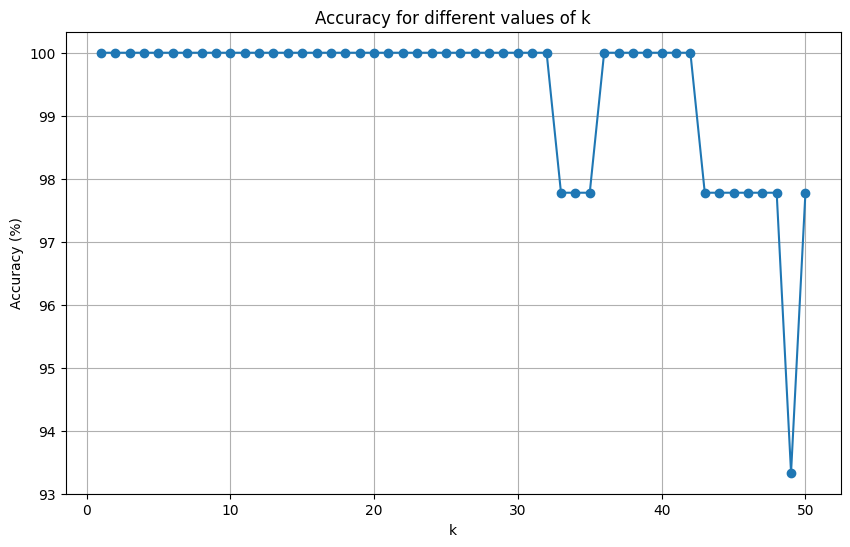

In [37]:
k_values = range(1, 51)
accuracies = [find_accuracy(k) for k in k_values]

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy for different values of k')
plt.xlabel('k')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()